<a href="https://colab.research.google.com/github/Smarth2005/Machine-Learning/blob/main/PCA_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Principal Component Analysis (PCA)
<blockquote>
  <h5>"Dimensionality reduction is not about discarding data—it's about discovering the hidden structure that makes sense of complexity."</i></h3>
  <p><h5><b>— Inspired by the philosophy of Principal Component Analysis</b></p>
</blockquote>

<div style="text-align: justify; text-justify: inter-word;">

  <h5> Understanding high-dimensional datasets can often feel like trying to navigate through fog — cluttered, confusing, and difficult to interpret.
  
  Principal Component Analysis (PCA) offers a powerful lens to bring clarity by reducing dimensions without losing the essence of the data.
  
  In this notebook, we explore PCA on the Breast Cancer dataset, diving into both the mathematics and implementation.
  
  
Our goal is not just to compress data, but to uncover the underlying patterns that drive meaningful insights — turning complexity into comprehension.
</div>




### 🧬 Step 1: Load and Understand the Breast Cancer Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [5]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


This dataset contains 30 numeric features computed from digitized images of breast masses. The target column indicates whether the mass is malignant (0) or benign (1).


### 🧹 Step 2: Standardize the Data
Since PCA is sensitive to the scale of the data, we standardize all features to have mean 0 and variance 1 before applying PCA.


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [8]:
scaled_data = scaler.transform(df)

`scaler.fit()` calculates the mean and variance of features to standardize the data, and `scaler.transform()` applies this scaling to the dataset before PCA.

In [9]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### 🔍 Step 3: Apply PCA and Visualize Explained Variance

We apply PCA on the standardized dataset to identify new orthogonal axes (principal components) that capture the maximum variance.

The `explained_variance_ratio_` attribute tells us how much variance each principal component explains in the dataset. Higher values indicate components that hold more information.


In [10]:
from sklearn.decomposition import PCA

# Initialize PCA to keep 2 principal components
pca = PCA(n_components=2)

# Fit PCA on scaled data and transform it
x_pca = pca.fit_transform(scaled_data)

In [11]:
print("Shape before PCA: ",scaled_data.shape)
print("Shape after  PCA: ",x_pca.shape)

Shape before PCA:  (569, 30)
Shape after  PCA:  (569, 2)



We reduce the dataset from 30 features to 2 principal components. These two new features capture the maximum variance possible in two dimensions, enabling easier visualization and further analysis.


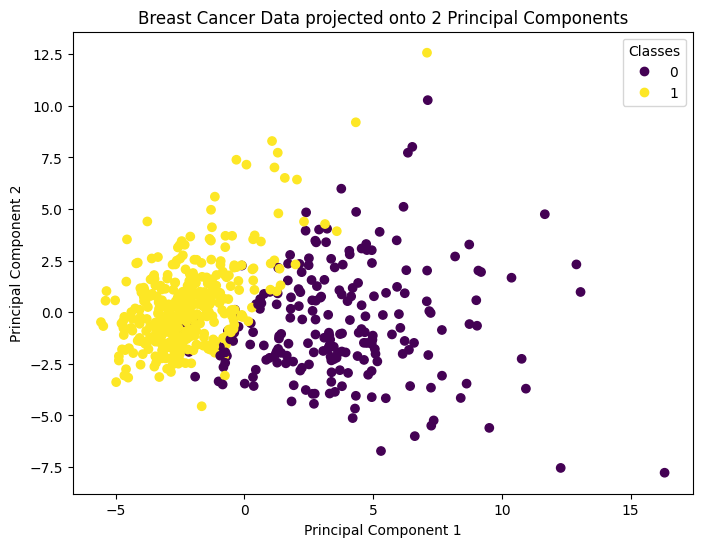

In [12]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(x_pca[:,0], x_pca[:,1], c= cancer['target'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Breast Cancer Data projected onto 2 Principal Components')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


The scatter plot shows how the dataset looks when projected onto the first two principal components. Colors represent different classes (malignant or benign). PCA helps visualize class separation in reduced dimensions.


#### Explained Variance Ratio of the Two Principal Components


In [14]:
explained_var_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio of 2 components:", explained_var_ratio)
print("Total Variance Explained by 2 components:", explained_var_ratio.sum())


Explained Variance Ratio of 2 components: [0.44272026 0.18971182]
Total Variance Explained by 2 components: 0.6324320765155944


Here, the two components together explain approximately 63.24% of the total variance in the dataset, indicating how well the dimensionality reduction preserves the data’s structure.


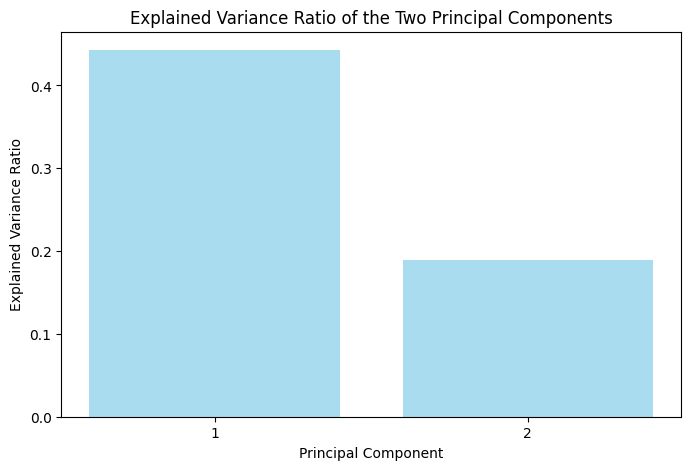

In [15]:
import matplotlib.pyplot as plt

explained_var_ratio_2 = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_var_ratio_2) + 1), explained_var_ratio_2, alpha=0.7, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of the Two Principal Components')
plt.xticks([1, 2])
plt.show()


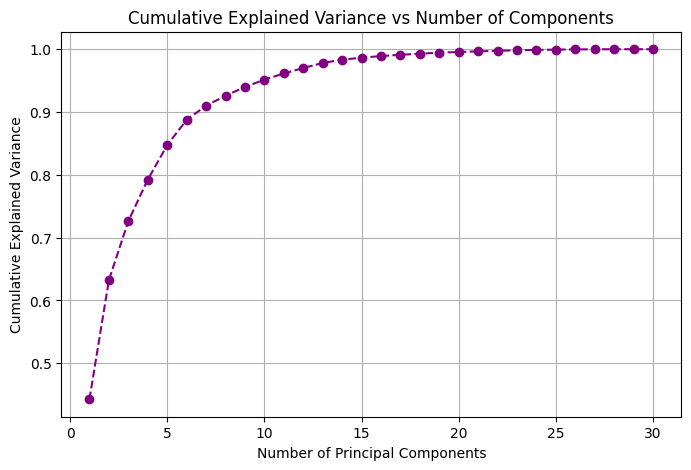

In [17]:
# Fit PCA with all components to get full explained variance info
pca_full = PCA()
pca_full.fit(scaled_data)

cumulative_variance = pca_full.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='purple')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.grid(True)
plt.show()


- The **bar plot** shows how much variance each of the two principal components individually explains.
- The **cumulative explained variance plot** shows how the total explained variance increases as more principal components are included.
